Un cas concret de régression : la régression par un perceptron multi-couche sera illustrée dans un Jupyter Notebook sur l'exemple du Boston House Prices Dataset en utilisant exclusivement TensorFlow / Keras (pas de scikit-learn)

In [18]:
# Importation des librairies
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# Charger l'ensemble de données
data = fetch_california_housing()

# Definition des features et target
X = data.data
y = data.target

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

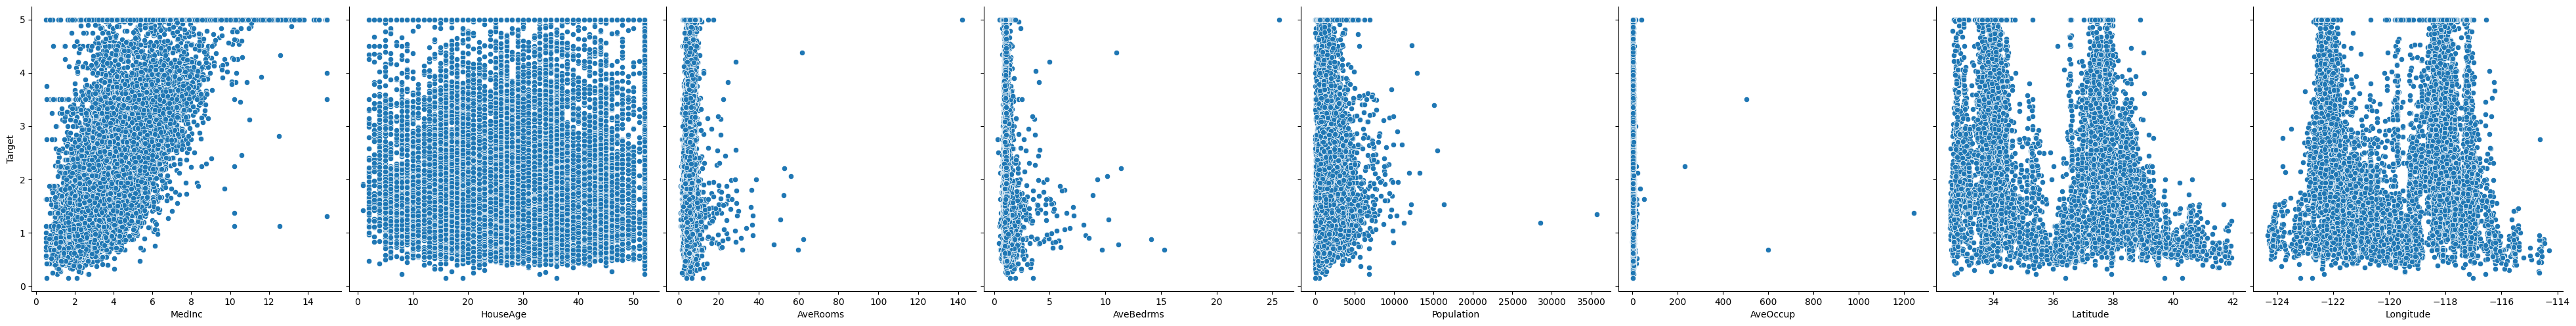

In [20]:
# Création d'un DataFrame à partir des données d'entraînement
train_df = pd.DataFrame(X_train, columns=data.feature_names)
train_df['Target'] = y_train

# Visualisation des relations entre les différentes variables et la variable cible
sns.pairplot(train_df, x_vars=data.feature_names, y_vars=['Target'], height=5)
plt.show()

In [21]:
# Mise à l'échelle des données avec StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(1)  # Pas d'activation pour la régression
])

c:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compilation du modele
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Entrainement
model.fit(X_train_scaled, y_train, epochs=50, verbose=1)

Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4867
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4934
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - loss: 0.4102
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - loss: 0.4033
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - loss: 0.3966
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3760
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3652
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3621
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3686
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3520
Epoch 11/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4386
Epoch 12/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3389
Epoch 13/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3416
Epoch 14/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3409
Epoch 15/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/ste

In [25]:
# Évaluation sur les données de test
test_loss = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on test data:", test_loss)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.3152
Mean Squared Error on test data: 0.344438761472702


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


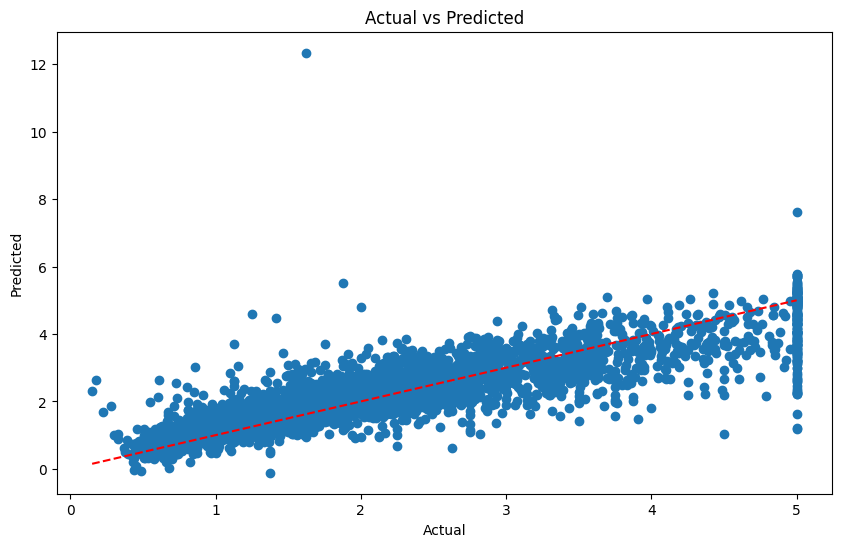

In [26]:
# Visualisation des résultats et métriques d'évaluation
predictions = model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [27]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.34443876142659374
R-squared: 0.7371517082483896
